# [**Jump to Tasks**](#Tasks)

In [51]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.94 s (started: 2024-08-06 20:15:43 +00:00)


In [52]:
import torch
import numpy as np

time: 292 µs (started: 2024-08-06 20:15:48 +00:00)


# Tensor Initialization

## Directly from data

In [53]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

time: 4.65 ms (started: 2024-08-06 20:15:48 +00:00)


## From a numpy array

In [54]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

time: 3.37 ms (started: 2024-08-06 20:15:48 +00:00)


## from another tensor

- retains porperties of x_data

In [55]:
x_ones = torch.ones_like(x_data)
x_ones

tensor([[1, 1],
        [1, 1]])

time: 4.71 ms (started: 2024-08-06 20:15:48 +00:00)


- overrides the datatype of x_data

In [56]:
x_rand = torch.rand_like(x_data, dtype=torch.float)
x_rand

tensor([[0.7031, 0.0231],
        [0.3318, 0.6202]])

time: 4.62 ms (started: 2024-08-06 20:15:48 +00:00)


## With random or constant values

In [57]:
shape = (2, 3)
rand_tensor = torch.rand(shape)
rand_tensor

tensor([[0.6271, 0.2127, 0.5294],
        [0.6508, 0.1856, 0.5247]])

time: 3.31 ms (started: 2024-08-06 20:15:48 +00:00)


In [58]:
ones_tensor = torch.ones(shape)
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

time: 3.45 ms (started: 2024-08-06 20:15:48 +00:00)


In [59]:
zeros_tensor = torch.zeros(shape)
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

time: 3.69 ms (started: 2024-08-06 20:15:48 +00:00)


# Tensor Attributes

In [60]:
tensor = torch.rand(3,4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
time: 775 µs (started: 2024-08-06 20:15:48 +00:00)


# Tensor Operations

In [61]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0
time: 776 µs (started: 2024-08-06 20:15:48 +00:00)


## Indexing/Slicing

In [62]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

time: 4.96 ms (started: 2024-08-06 20:15:48 +00:00)


## Joining Tensors

In [63]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t1

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])

time: 5.85 ms (started: 2024-08-06 20:15:48 +00:00)


## Multiplying Tensors

- element-wise product

In [64]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")

# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
time: 2.97 ms (started: 2024-08-06 20:15:48 +00:00)


- matrix multiplication

In [65]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
time: 2.66 ms (started: 2024-08-06 20:15:48 +00:00)


## In-place Operations

In [66]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])
time: 4.82 ms (started: 2024-08-06 20:15:48 +00:00)


# Bridge with NumPy

- Tensor to NumPy array: A change in the tensor reflects in the NumPy array

In [67]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")


t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]
time: 3.48 ms (started: 2024-08-06 20:15:48 +00:00)


- NumPy array to Tensor: Changes in the NumPy array reflects in the tensor.

In [68]:
n = np.ones(5)
t = torch.from_numpy(n)
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]
time: 1.59 ms (started: 2024-08-06 20:15:48 +00:00)


# torch.autograd

## Differentiation in Autograd

In [69]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

time: 504 µs (started: 2024-08-06 20:15:48 +00:00)


In [70]:
Q = 3*a**3 - b**2
Q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

time: 5.17 ms (started: 2024-08-06 20:15:49 +00:00)


In [71]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

time: 769 µs (started: 2024-08-06 20:15:49 +00:00)


In [72]:
a.grad

tensor([36., 81.])

time: 3.64 ms (started: 2024-08-06 20:15:49 +00:00)


In [73]:
b.grad

tensor([-12.,  -8.])

time: 3.02 ms (started: 2024-08-06 20:15:49 +00:00)


In [74]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)


tensor([True, True])
tensor([True, True])
time: 3.61 ms (started: 2024-08-06 20:15:49 +00:00)


# Define the network

In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    # an affine operation: y = Wx + b
    # 784 is the input dimension, and 68 is the output dimenstion of the first hidden layer
    self.fc1 = nn.Linear(784, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    # apply the first layer with relu activation
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
time: 2.48 ms (started: 2024-08-06 20:15:49 +00:00)


In [76]:
params = list(net.parameters())
print(len(params))

for p in params:
  print(p.size())

6
torch.Size([64, 784])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])
time: 744 µs (started: 2024-08-06 20:15:49 +00:00)


# Define a Loss function and optimizer

In [77]:
import torch.optim as optim

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

time: 2.54 ms (started: 2024-08-06 20:15:49 +00:00)


# Loading a Dataset

In [78]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.MNIST(
  root="data",
  train=True,
  download=True,
  transform=ToTensor()
)

test_data = datasets.MNIST(
  root="data",
  train=False,
  download=True,
  transform=ToTensor()
)

time: 90.2 ms (started: 2024-08-06 20:15:49 +00:00)


In [79]:
training_data[0][0].shape

torch.Size([1, 28, 28])

time: 3.24 ms (started: 2024-08-06 20:15:49 +00:00)


# Iterating and Visualizing the Dataset

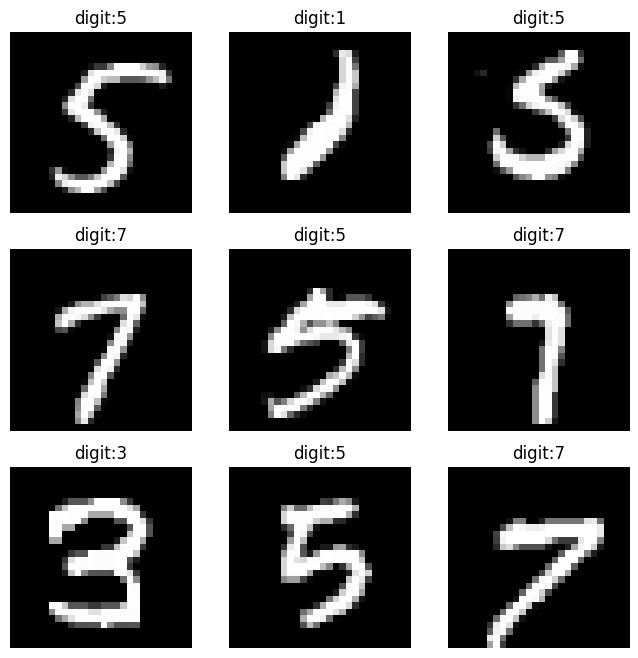

time: 805 ms (started: 2024-08-06 20:15:49 +00:00)


In [80]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title("digit:" + str(label))
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Preparing your data for training with DataLoaders

In [81]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=4, shuffle=True)

time: 896 µs (started: 2024-08-06 20:15:50 +00:00)


# Iterate through the DataLoader

Feature batch shape: torch.Size([4, 1, 28, 28])
Labels batch shape: torch.Size([4])


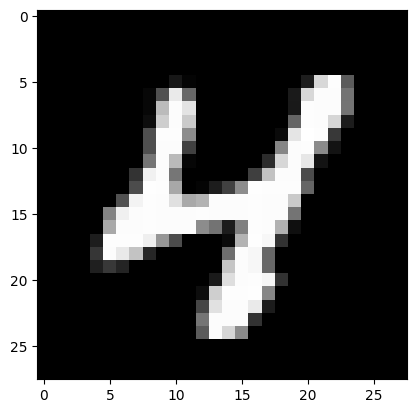

Label: 4
time: 239 ms (started: 2024-08-06 20:15:50 +00:00)


In [82]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Train the network

In [83]:
for epoch in range(2): # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    iteration_loss = loss(outputs, labels)
    iteration_loss.backward()
    optimizer.step()

    # print statistics
    running_loss += iteration_loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.263
[1,  4000] loss: 2.112
[1,  6000] loss: 1.763
[1,  8000] loss: 1.279
[1, 10000] loss: 0.875
[1, 12000] loss: 0.673
[1, 14000] loss: 0.583
[2,  2000] loss: 0.494
[2,  4000] loss: 0.468
[2,  6000] loss: 0.452
[2,  8000] loss: 0.419
[2, 10000] loss: 0.401
[2, 12000] loss: 0.368
[2, 14000] loss: 0.374
Finished Training
time: 1min 1s (started: 2024-08-06 20:15:50 +00:00)


# Test the network on the test data

In [84]:
PATH = './my_net.pth'
torch.save(net.state_dict(), PATH)

time: 2.8 ms (started: 2024-08-06 20:16:51 +00:00)


In [85]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

time: 6.13 ms (started: 2024-08-06 20:16:51 +00:00)


In [86]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')


Accuracy of the network on the 10000 test images: 90 %
time: 2.25 s (started: 2024-08-06 20:16:51 +00:00)


# Training on GPU

In [87]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0
time: 1.52 ms (started: 2024-08-06 20:16:53 +00:00)


In [88]:
net = Net()

net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

time: 5.47 ms (started: 2024-08-06 20:16:53 +00:00)


<a name="Tasks"></a>
# **Tasks**

## Task 1

In [93]:
x1 = torch.tensor([1.], requires_grad=True)
x2 = torch.tensor([1.], requires_grad=True)

y = (3*x1 - 2*x2 - 2) ** 2
y.backward()

print(x1.grad)
print(x2.grad)

tensor([-6.])
tensor([4.])
time: 3.46 ms (started: 2024-08-06 20:25:56 +00:00)


In [94]:
print((18*x1 - 12*x2 - 12) == x1.grad)
print((8*x2 - 12*x2 + 8) == x2.grad)

tensor([True])
tensor([True])
time: 1.36 ms (started: 2024-08-06 20:25:56 +00:00)


## Task 2

- **torch.Size([64, 784]):** This represents the weight matrix for the first layer of the neural network. It has a size of 64 (output features) by 784 (input features).

- **torch.Size([64]):** This represents the bias vector for the first layer. It has a size of 64, corresponding to the number of output features in the first layer.

- **torch.Size([64, 64]):** This represents the weight matrix for the second layer of the neural network. It has a size of 64 (output features) by 64 (input features).

- **torch.Size([64]):** This represents the bias vector for the second layer. It has a size of 64, corresponding to the number of output features in the second layer.

- **torch.Size([10, 64]):** This represents the weight matrix for the third (output) layer of the neural network. It has a size of 10 (output classes) by 64 (input features from the previous layer).

- **torch.Size([10]):** This represents the bias vector for the third layer. It has a size of 10, corresponding to the number of output classes in the network.

In [95]:
input = torch.randn(1, 784)
out = net(input)

print(out)

tensor([[-173.3796, -164.6014, -201.3859, -131.5352, -219.1172,  -18.7918,
         -160.7294, -153.5840, -167.1392, -142.1912]],
       grad_fn=<AddmmBackward0>)
time: 2.96 ms (started: 2024-08-06 20:25:56 +00:00)


## Task 3

In [96]:
input = torch.randn(4, 784)
out = net(input)

print(out)

tensor([[-141.9355, -187.7236, -186.9838, -122.3462, -166.6523,  -35.1292,
         -159.3612, -146.6368, -121.6866,  -82.7576],
        [  -9.8638,  -32.0218,  -19.4798,  -35.0303,  -14.6128,  -27.3734,
          -20.3717,   -9.5742,  -29.7955,  -22.9758],
        [ -88.1020, -210.0890, -117.4113, -132.0750, -114.8233,  -94.4386,
         -152.4959,  -59.8701, -200.8784,  -90.7383],
        [ -98.5790, -102.1735, -123.5575,  -41.9450, -131.8499,   17.1098,
         -101.6135,  -89.4320, -103.9885,  -46.9661]],
       grad_fn=<AddmmBackward0>)
time: 4.43 ms (started: 2024-08-06 20:25:56 +00:00)


## Task 4

- **Epoch**: An epoch is a single pass through the entire training dataset. The outer loop for epoch in range(2) indicates that the training process will loop over the dataset two times.

- **Forward Pass**: The forward pass is the process of passing input data through the neural network to compute the predicted outputs. In this code, outputs = net(torch.flatten(inputs, 1)) represents the forward pass, where inputs are passed through the neural network (net) after being flattened along the second dimension using torch.flatten(inputs, 1).

- **Backward Pass**: The backward pass, also known as backpropagation, is the process of computing gradients of the loss function with respect to the network's parameters. This is done using the backward() method: iteration_loss.backward(). It computes gradients for all the tensors used to compute iteration_loss.


- **torch.flatten(inputs, 1)**: This function reshapes the input tensor inputs to have a flattened shape along the second dimension (dimension 1). It's likely used to prepare the input data for the neural network if it expects a flattened representation.

- **Optimizer**: optimizer.step() updates the parameters of the neural network using the computed gradients and the optimization algorithm (e.g., SGD, Adam) to minimize the loss. It adjusts the network's weights and biases based on the computed gradients and the specified optimization strategy.

## Task 5:

In [97]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Assuming net is the previously defined neural network with 2 hidden layers

class ThreeHiddenLayerNet(nn.Module):
    def __init__(self):
        super(ThreeHiddenLayerNet, self).__init__()
        self.fc1 = nn.Linear(784, 64)  # First hidden layer
        self.fc2 = nn.Linear(64, 64)   # Second hidden layer
        self.fc3 = nn.Linear(64, 64)   # Third hidden layer
        self.fc4 = nn.Linear(64, 10)   # Output layer

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))   # ReLU activation for first hidden layer
        x = torch.relu(self.fc2(x))   # ReLU activation for second hidden layer
        x = torch.relu(self.fc3(x))   # ReLU activation for third hidden layer
        x = self.fc4(x)               # Output layer without activation (for example, using CrossEntropyLoss)
        return x

time: 619 µs (started: 2024-08-06 20:25:56 +00:00)


In [98]:
# Initialize the network
net = ThreeHiddenLayerNet()

# Define the loss function and optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

for epoch in range(2): # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
    inputs, labels = data
    optimizer.zero_grad()

    outputs = net(torch.flatten(inputs,1))
    iteration_loss = loss(outputs, labels)
    iteration_loss.backward()
    optimizer.step()

    running_loss += iteration_loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished Training')

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

[1,  2000] loss: 2.305
[1,  4000] loss: 2.294
[1,  6000] loss: 2.277
[1,  8000] loss: 2.244
[1, 10000] loss: 2.153
[1, 12000] loss: 1.888
[1, 14000] loss: 1.453
[2,  2000] loss: 0.930
[2,  4000] loss: 0.772
[2,  6000] loss: 0.671
[2,  8000] loss: 0.615
[2, 10000] loss: 0.544
[2, 12000] loss: 0.520
[2, 14000] loss: 0.494
Finished Training
Accuracy of the network on the 10000 test images: 86 %
time: 57.1 s (started: 2024-08-06 20:25:56 +00:00)


## Task 6

In [99]:
# Initialize the network
net = ThreeHiddenLayerNet()

# Use Adam optimizer with a learning rate of 0.001
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()
        running_loss += iteration_loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

[1,  2000] loss: 0.593
[1,  4000] loss: 0.308
[1,  6000] loss: 0.236
[1,  8000] loss: 0.205
[1, 10000] loss: 0.200
[1, 12000] loss: 0.179
[1, 14000] loss: 0.165
[2,  2000] loss: 0.131
[2,  4000] loss: 0.141
[2,  6000] loss: 0.125
[2,  8000] loss: 0.138
[2, 10000] loss: 0.126
[2, 12000] loss: 0.116
[2, 14000] loss: 0.122
Finished Training
Accuracy of the network on the 10000 test images: 96 %
time: 1min 40s (started: 2024-08-06 20:26:53 +00:00)


## Task 7

Working with a small network:

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

for epoch in range(2): # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data[0].to(device), data[1].to(device)
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    iteration_loss = loss(outputs, labels)
    iteration_loss.backward()
    optimizer.step()

    # print statistics
    running_loss += iteration_loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.265
[1,  4000] loss: 2.141
[1,  6000] loss: 1.850
[1,  8000] loss: 1.321
[1, 10000] loss: 0.896
[1, 12000] loss: 0.680
[1, 14000] loss: 0.601
[2,  2000] loss: 0.506
[2,  4000] loss: 0.467
[2,  6000] loss: 0.442
[2,  8000] loss: 0.419
[2, 10000] loss: 0.386
[2, 12000] loss: 0.390
[2, 14000] loss: 0.374
Finished Training
time: 1min 5s (started: 2024-08-06 20:16:53 +00:00)


CPU time: 1min 1s

GPU time: 1min 5s

Working with two hidden layers, the speedup isn't that significant.

- Let's try to increase the size of the network, keeping the same number of hidden layers:

In [ ]:
class LargerTwoHiddenLayerNet(nn.Module):
    def __init__(self):
        super(LargerTwoHiddenLayerNet, self).__init__()
        self.fc1 = nn.Linear(784, 512)  # First hidden layer with 128 neurons
        self.fc2 = nn.Linear(512, 512)  # Second hidden layer with 128 neurons
        self.fc3 = nn.Linear(512, 10)   # Output layer with 10 neurons

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))   # ReLU activation for first hidden layer
        x = torch.relu(self.fc2(x))   # ReLU activation for second hidden layer
        x = self.fc3(x)               # Output layer without activation (for example, using CrossEntropyLoss)
        return x

time: 747 µs (started: 2024-08-06 20:17:59 +00:00)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Training on {device}")

# Initialize the larger network and move it to the device (GPU if available)
net = LargerTwoHiddenLayerNet().to(device)

# Define the loss function
loss = nn.CrossEntropyLoss()

# Use Adam optimizer with a learning rate of 0.001
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Assuming train_dataloader contains your training dataset
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        # Move the inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()
        running_loss += iteration_loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


Training on cuda:0
[1,  2000] loss: 0.432
[1,  4000] loss: 0.245
[1,  6000] loss: 0.200
[1,  8000] loss: 0.178
[1, 10000] loss: 0.152
[1, 12000] loss: 0.167
[1, 14000] loss: 0.143
[2,  2000] loss: 0.106
[2,  4000] loss: 0.123
[2,  6000] loss: 0.112
[2,  8000] loss: 0.121
[2, 10000] loss: 0.118
[2, 12000] loss: 0.116
[2, 14000] loss: 0.106
Finished Training
time: 1min 15s (started: 2024-08-06 20:17:59 +00:00)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Assuming net is the previously defined neural network with 3 hidden layers

# Check if GPU is available and set the device
device = torch.device("cpu")
print(f"Training on {device}")

# Initialize the larger network and move it to the device (GPU if available)
net = LargerTwoHiddenLayerNet().to(device)

# Define the loss function
loss = nn.CrossEntropyLoss()

# Use Adam optimizer with a learning rate of 0.001
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Assuming train_dataloader contains your training dataset
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        # Move the inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()
        running_loss += iteration_loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Training on cpu
[1,  2000] loss: 0.423
[1,  4000] loss: 0.246
[1,  6000] loss: 0.196
[1,  8000] loss: 0.174
[1, 10000] loss: 0.171
[1, 12000] loss: 0.159
[1, 14000] loss: 0.143
[2,  2000] loss: 0.118
[2,  4000] loss: 0.097
[2,  6000] loss: 0.122
[2,  8000] loss: 0.107
[2, 10000] loss: 0.110
[2, 12000] loss: 0.115
[2, 14000] loss: 0.124
Finished Training
time: 6min 41s (started: 2024-08-06 20:19:14 +00:00)


GPU time: 1min 15s

CPU time: 6min 41s

The significant difference is vey obvious, working with a bigger size than before.

- Let's try working on the three hidden layers network:

In [100]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Training on {device}")

# Initialize the larger network and move it to the device (GPU if available)
net = ThreeHiddenLayerNet().to(device)

# Define the loss function
loss = nn.CrossEntropyLoss()

# Use Adam optimizer with a learning rate of 0.001
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Assuming train_dataloader contains your training dataset
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        # Move the inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()
        running_loss += iteration_loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


Training on cuda:0
[1,  2000] loss: 0.606
[1,  4000] loss: 0.299
[1,  6000] loss: 0.241
[1,  8000] loss: 0.209
[1, 10000] loss: 0.186
[1, 12000] loss: 0.178
[1, 14000] loss: 0.171
[2,  2000] loss: 0.128
[2,  4000] loss: 0.143
[2,  6000] loss: 0.146
[2,  8000] loss: 0.125
[2, 10000] loss: 0.125
[2, 12000] loss: 0.120
[2, 14000] loss: 0.121
Finished Training
time: 1min 16s (started: 2024-08-06 20:35:33 +00:00)


In [101]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Assuming net is the previously defined neural network with 3 hidden layers

# Check if GPU is available and set the device
device = torch.device("cpu")
print(f"Training on {device}")

# Initialize the larger network and move it to the device (GPU if available)
net = ThreeHiddenLayerNet().to(device)

# Define the loss function
loss = nn.CrossEntropyLoss()

# Use Adam optimizer with a learning rate of 0.001
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Assuming train_dataloader contains your training dataset
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        # Move the inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()
        running_loss += iteration_loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Training on cpu
[1,  2000] loss: 0.619
[1,  4000] loss: 0.298
[1,  6000] loss: 0.250
[1,  8000] loss: 0.228
[1, 10000] loss: 0.193
[1, 12000] loss: 0.180
[1, 14000] loss: 0.166
[2,  2000] loss: 0.141
[2,  4000] loss: 0.144
[2,  6000] loss: 0.126
[2,  8000] loss: 0.129
[2, 10000] loss: 0.139
[2, 12000] loss: 0.140
[2, 14000] loss: 0.131
Finished Training
time: 1min 38s (started: 2024-08-06 20:36:50 +00:00)


GPU time: 1min 16s

CPU time: 1min 38s

There's a slight different, working with three hidden layers instead of two. So, maybe the number of neurons in each layer plays a big role in the performance.